In [41]:
import importlib
import utils
importlib.reload(utils)
from utils import *
import pandas as pd

In [31]:
df = pd.read_csv("Simulation_Outputs_fr", delimiter="\t")
df2 = pd.read_csv("Simulation_Outputs_sp", delimiter="\t")

col_2_fr = df.iloc[:, 5].values
consommation_fr = pd.DataFrame(col_2_fr.reshape(-1, 24))
consommation2_fr = pd.DataFrame(col_2_fr.reshape(-1, 24))

col_2_sp = df2.iloc[:, 5].values
consommation_sp = pd.DataFrame(col_2_sp.reshape(-1, 24))
consommation2_sp = pd.DataFrame(col_2_sp.reshape(-1, 24))

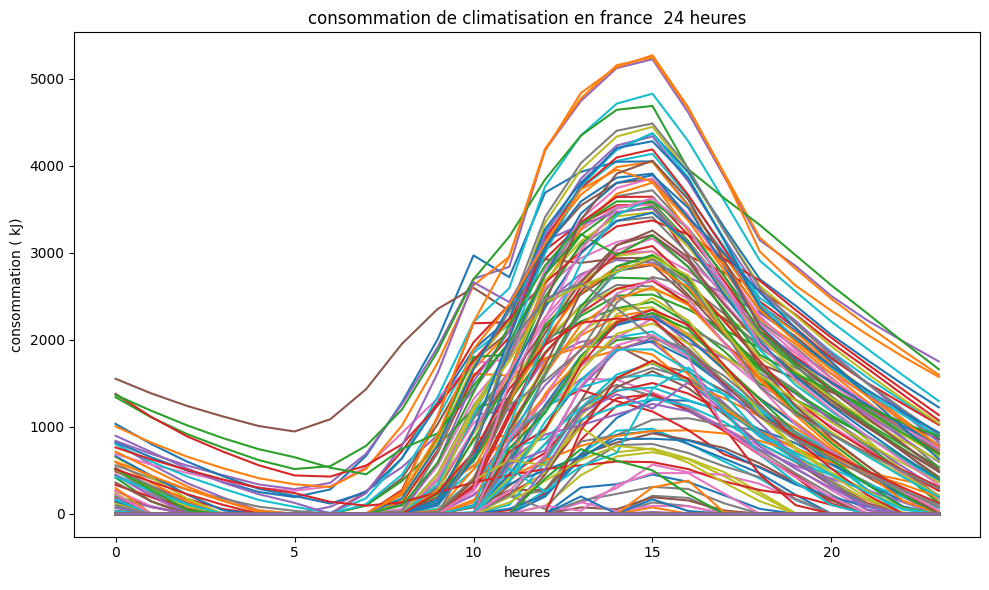

In [32]:
draw(consommation2_fr,"consommation de climatisation en france  24 heures","heures","consommation ( kJ)")

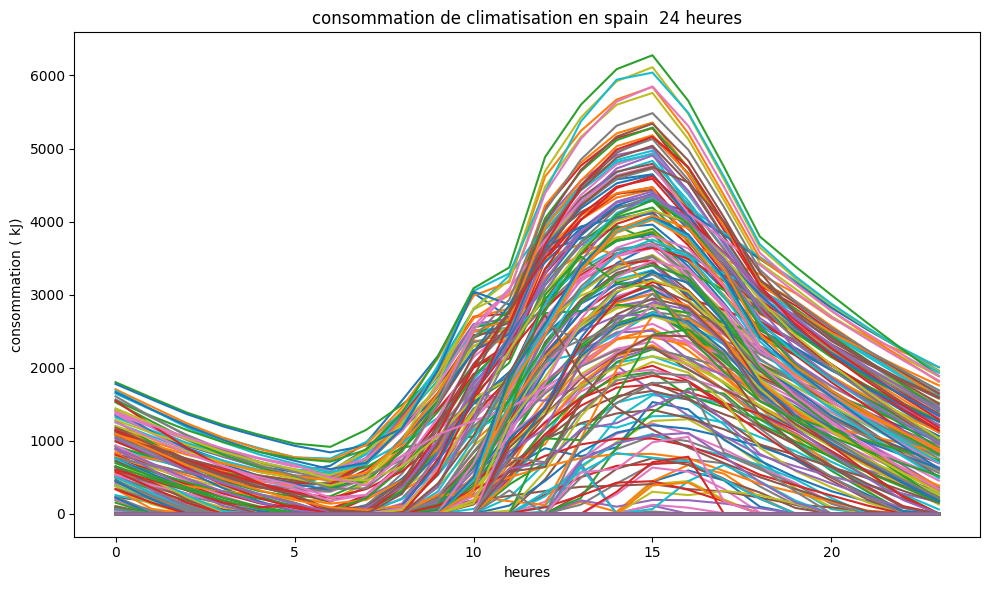

In [33]:
draw(consommation2_sp,"consommation de climatisation en spain  24 heures","heures","consommation ( kJ)")

In [34]:
consommation_fr["cool_on"] = 1
for index, row in consommation_fr.iterrows():
    row_sum = row.drop('cool_on').sum()
    if row_sum == 0.0:
        consommation_fr.at[index, "cool_on"] = 0  
    else:
        consommation_fr.at[index, "cool_on"] = 1
consommation2_fr=consommation_fr.copy()

In [35]:
consommation_sp["cool_on"] = 1
for index, row in consommation_sp.iterrows():
    row_sum = row.drop('cool_on').sum()
    if row_sum == 0.0:
        consommation_sp.at[index, "cool_on"] = 0  
    else:
        consommation_sp.at[index, "cool_on"] = 1
consommation2_sp=consommation_sp.copy()

In [36]:
consommation_cool_fr = consommation_fr[consommation_fr["cool_on"] == 1].drop(columns=["cool_on"])
model = apply_kmeans(n_clusters=3, data=consommation_cool_fr)
consommation_fr.loc[consommation_fr["cool_on"] == 1, "clusters"] = model.labels_
consommation_fr.loc[consommation_fr["cool_on"] == 0, "clusters"] = 3


In [37]:
consommation_cool_sp = consommation_sp[consommation_sp["cool_on"] == 1].drop(columns=["cool_on"])
model = apply_kmeans(n_clusters=3, data=consommation_cool_sp)
consommation_sp.loc[consommation_sp["cool_on"] == 1, "clusters"] = model.labels_
consommation_sp.loc[consommation_sp["cool_on"] == 0, "clusters"] = 3

***************3 clusters pour les jours où la climatisation  est allumé et 1 cluster pour les jours d'hiver en france ***************


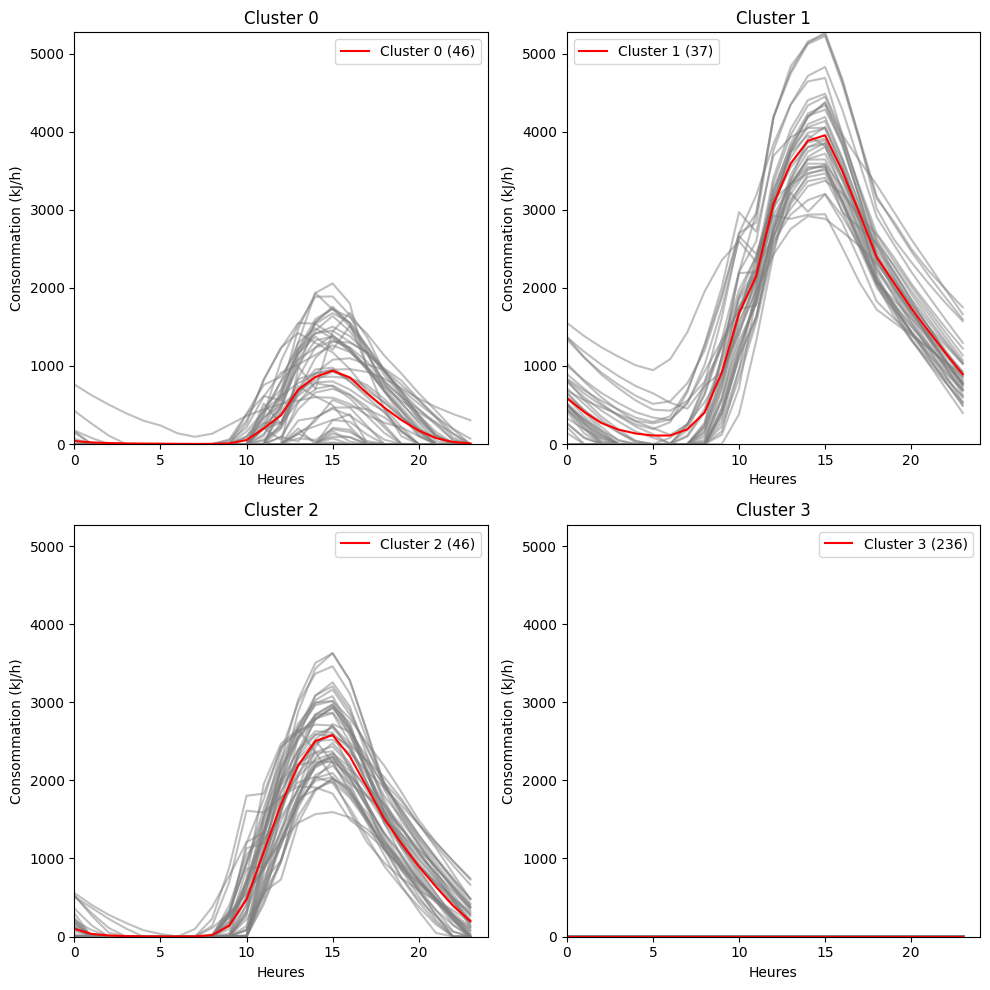

In [38]:
print("***************3 clusters pour les jours où la climatisation  est allumé et 1 cluster pour les jours d'hiver en france ***************")
plot_clusters(consommation_fr.drop(columns=["cool_on"]))

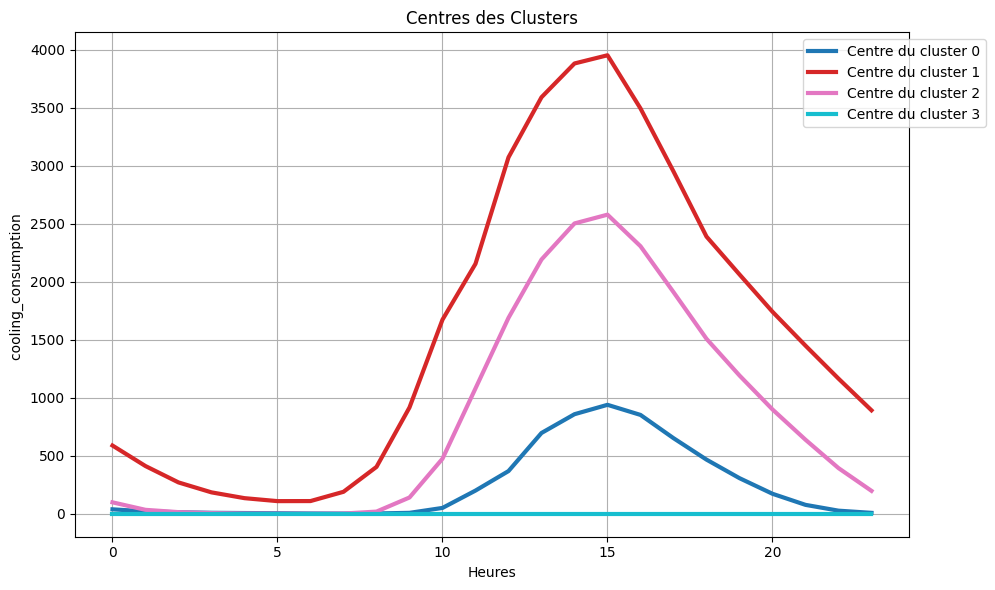

In [39]:
plot_cluster_centers_with_colors(consommation_fr.drop(columns=["cool_on"]), consommation_fr["clusters"], y_label="cooling_consumption ")

In [42]:
evaluate_clustering_cooling(consommation_fr)

Davies-Bouldin Index: 0.7141673609792027
Silhouette Score: 0.7350071312803381


In [ ]:
consommation_fr.to_csv("consommation_cool_fr",index=False)

***************3 clusters pour les jours où la climatisation  est allumé et 1 cluster pour les jours d'hiver en spain ***************


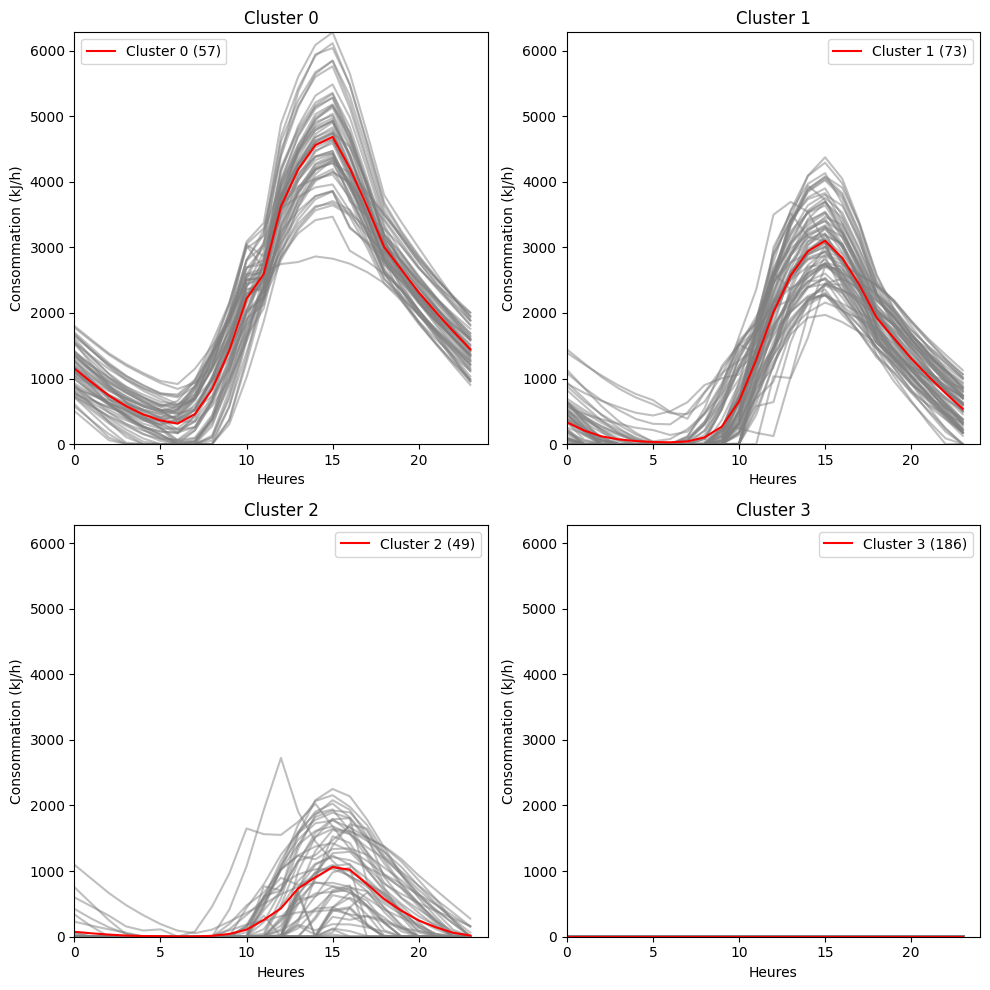

In [43]:
print("***************3 clusters pour les jours où la climatisation  est allumé et 1 cluster pour les jours d'hiver en spain ***************")
plot_clusters(consommation_sp.drop(columns=["cool_on"]))

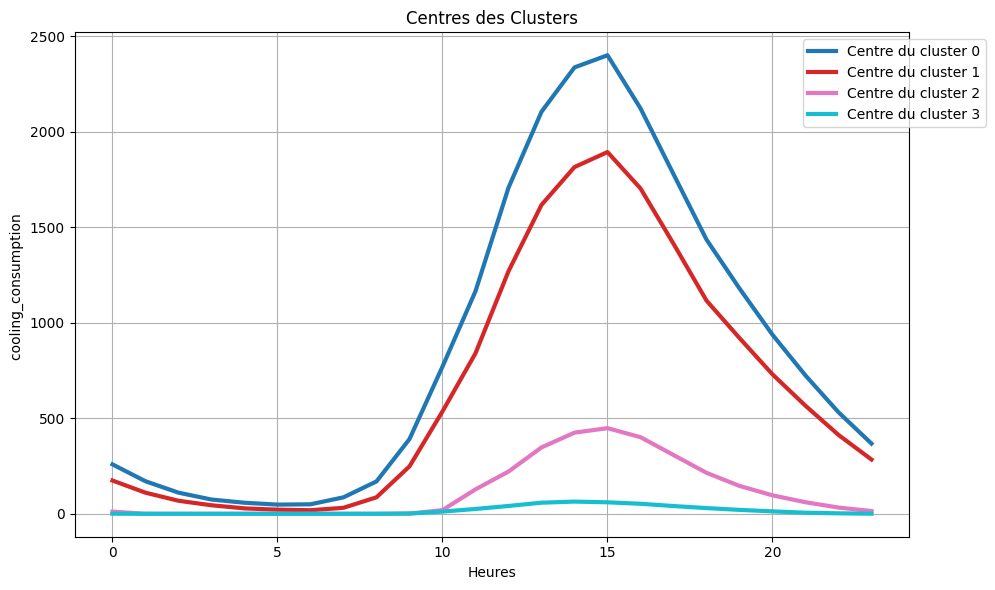

In [48]:
plot_cluster_centers_with_colors(consommation_fr.drop(columns=["cool_on"]), consommation_sp["clusters"], y_label="cooling_consumption ")

In [49]:
evaluate_clustering_cooling(consommation_sp)

Davies-Bouldin Index: 0.7014607841787099
Silhouette Score: 0.6612458862941283


In [50]:
consommation_sp.to_csv("consommation_cool_sp",index=False)